In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math

https://huacayacauh.github.io/JS-Sandpile/JS-Sandpile.html

In [5]:
grid_size = 11 # odd
input_size = 32
spile = np.zeros((grid_size, grid_size), dtype=np.uint32)
spile[(grid_size//2), (grid_size//2)] = input_size        

def do_add( spile, tumbled ):
    """ Updates spile in place """
    spile[ :-1, :] += tumbled[ 1:, :] # Shift N and add                 
    spile[ 1:, :] += tumbled[ :-1, :] # Shift S   
    spile[ :, :-1] += tumbled[ :, 1:] # Shift W
    spile[ :, 1:] += tumbled[ :, :-1] # Shift E

def tumble( spile ):
    while ( spile > 3 ).any():
        tumbled, spile = np.divmod( spile, 4 )
        do_add( spile, tumbled )
        # print( spile, '\n' )  # Uncomment to print steps
    return spile

tumble( spile )

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0],
       [0, 0, 0, 3, 1, 0, 1, 3, 0, 0, 0],
       [0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint32)

tupple: adding the laplacian of the delta function $\bigtriangleup(\delta v)$  
https://www.youtube.com/@mishashkolnikov7411

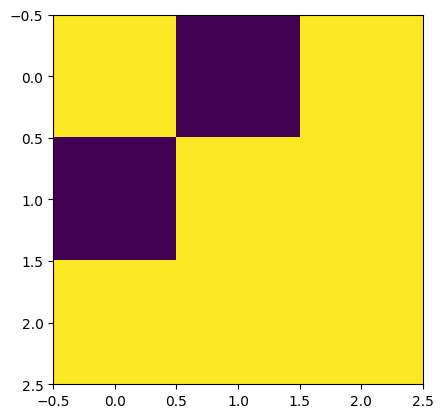

In [4]:
m1 = np.array([[1,0,1],[0,1,1],[1,1,1]])
plt.imshow(m1, interpolation='nearest');plt.show()

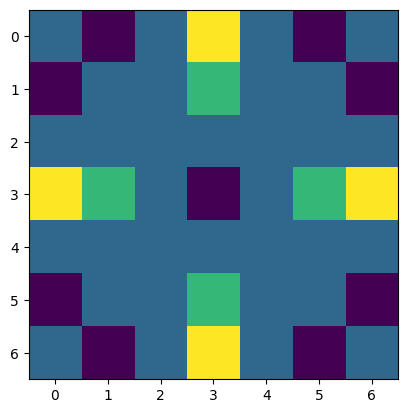

In [6]:
m2 = np.flip(np.rot90(m1))
lineN = np.array([x for x in range(3, 0, -1)]).reshape(3,1)
mh = np.concatenate((m1,lineN,m2), axis=1)
lineS = np.array([x for x in range(3, 0, -1)]+[0]+[x+1 for x in range(3)]).reshape(1,7)

mh = np.concatenate((mh,lineS, np.flip(mh)), axis=0)
plt.imshow(mh, interpolation='nearest');plt.show()

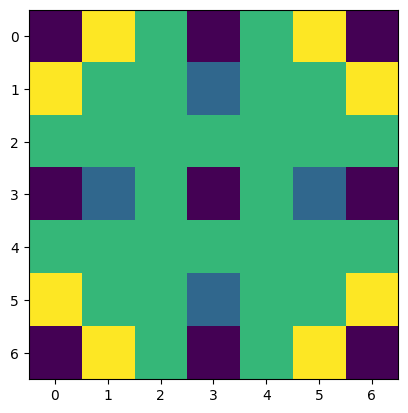

In [497]:
mh = tumble(mh + mh)
plt.imshow(mh, interpolation='nearest');plt.show()

[[2 1 1 1 1 1 1 1 2]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [2 1 1 1 1 1 1 1 2]]


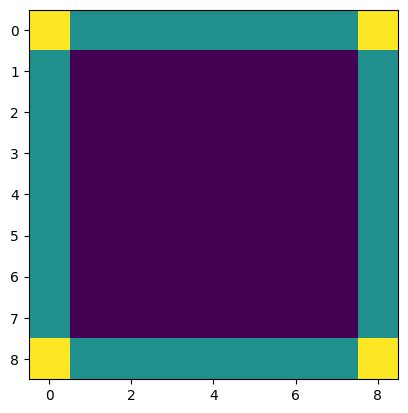

In [448]:
mb1 = np.array([[2,1,1,1],[1,0,0,0],[1,0,0,0],[1,0,0,0]])
mb2 = np.flip(np.rot90(mb1))
linebN = np.array([1]+[0 for x in range(3, 0, -1)]).reshape(4,1)
mbh = np.concatenate((mb1,linebN,mb2), axis=1)
lineS = np.array([1]+[0 for x in range(3, 0, -1)]+[0]+[0 for x in range(3)]+[1]).reshape(1,9)

mbh = np.concatenate((mbh,lineS, np.flip(mbh)), axis=0)
print(mbh)
plt.imshow(mbh, interpolation='nearest');plt.show()

## Identity

In [471]:
mbh_new = tumble(mbh+mbh)

[[0 2 1 3 2 3 1 2 0]
 [2 2 3 3 2 3 3 2 2]
 [1 3 2 2 1 2 2 3 1]
 [3 3 2 2 1 2 2 3 3]
 [2 2 1 1 0 1 1 2 2]
 [3 3 2 2 1 2 2 3 3]
 [1 3 2 2 1 2 2 3 1]
 [2 2 3 3 2 3 3 2 2]
 [0 2 1 3 2 3 1 2 0]]


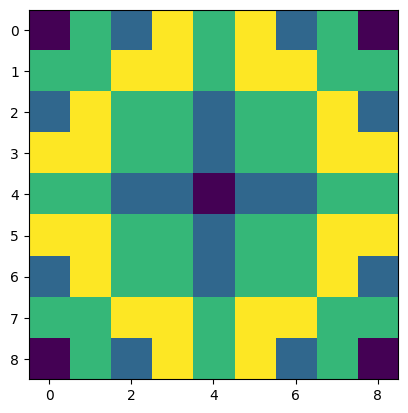

In [485]:
mbh_new = tumble(mbh_new+mbh) #repeat
print(mbh_new)
plt.imshow(mbh_new, interpolation='nearest');plt.show()